In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass
from echospec.simulation.args import QubitConfig
from echospec.simulation.spectroscopy import Spectroscopy, Options

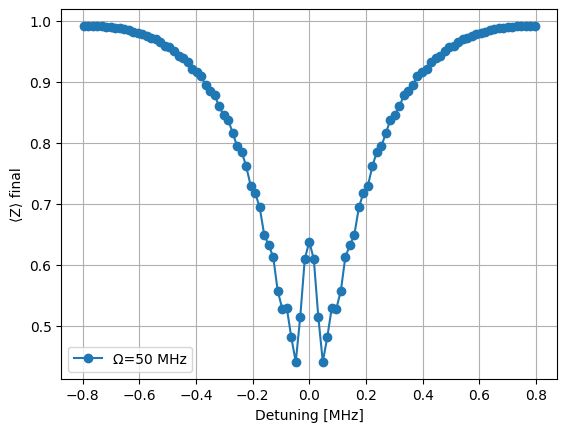

In [2]:
qubit_config = QubitConfig()
Options(plot=True)

detunings = np.linspace(-5e6, 5e6, 101)

spectroscopy = Spectroscopy(detunings, qubit_config, options=Options(plot=True))

results = spectroscopy.run()

In [3]:
results.data

<xarray.DataArray 'expectation_values' (detuning: 101, observable: 3, time: 1000)> Size: 2MB
array([[[ 0.00000000e+00,  1.25349555e-04,  4.95865147e-04, ...,
          1.38169883e-02,  1.18620575e-02,  9.69350225e-03],
        [ 0.00000000e+00, -1.24909987e-03, -2.44763901e-03, ...,
          8.91141834e-03,  1.02098884e-02,  1.10937541e-02],
        [ 1.00000000e+00,  9.99999211e-01,  9.99996873e-01, ...,
          9.91237462e-01,  9.91261245e-01,  9.91286350e-01]],

       [[ 0.00000000e+00,  1.22858981e-04,  4.86205221e-04, ...,
          9.98337640e-03,  1.11295630e-02,  1.20873846e-02],
        [ 0.00000000e+00, -1.24943075e-03, -2.45025147e-03, ...,
         -6.38663868e-03, -5.54756368e-03, -4.50145751e-03],
        [ 1.00000000e+00,  9.99999211e-01,  9.99996872e-01, ...,
          9.91366014e-01,  9.91369983e-01,  9.91375151e-01]],

       [[ 0.00000000e+00,  1.20367425e-04,  4.76529781e-04, ...,
          4.21427631e-03,  4.66558738e-03,  5.18189176e-03],
        [ 0.00000000e+00, -1.24975499e-03, -2.45281274e-03, ...,
         -2.20612914e-03, -2.59837441e-03, -2.89391701e-03],
        [ 1.00000000e+00,  9.99999211e-01,  9.99996870e-01, ...,
          9.91379127e-01,  9.91387587e-01,  9.91395607e-01]],
...
         -4.21427631e-03, -4.66558738e-03, -5.18189176e-03],
        [ 0.00000000e+00, -1.24975499e-03, -2.45281274e-03, ...,
         -2.20612914e-03, -2.59837441e-03, -2.89391701e-03],
        [ 1.00000000e+00,  9.99999211e-01,  9.99996870e-01, ...,
          9.91379127e-01,  9.91387587e-01,  9.91395607e-01]],

       [[ 0.00000000e+00, -1.22858981e-04, -4.86205221e-04, ...,
         -9.98337640e-03, -1.11295630e-02, -1.20873846e-02],
        [ 0.00000000e+00, -1.24943075e-03, -2.45025147e-03, ...,
         -6.38663868e-03, -5.54756368e-03, -4.50145751e-03],
        [ 1.00000000e+00,  9.99999211e-01,  9.99996872e-01, ...,
          9.91366014e-01,  9.91369983e-01,  9.91375151e-01]],

       [[ 0.00000000e+00, -1.25349555e-04, -4.95865147e-04, ...,
         -1.38169883e-02, -1.18620575e-02, -9.69350225e-03],
        [ 0.00000000e+00, -1.24909987e-03, -2.44763901e-03, ...,
          8.91141834e-03,  1.02098884e-02,  1.10937541e-02],
        [ 1.00000000e+00,  9.99999211e-01,  9.99996873e-01, ...,
          9.91237462e-01,  9.91261245e-01,  9.91286350e-01]]],
      shape=(101, 3, 1000))
Coordinates:
  * detuning    (detuning) float64 808B -5e+06 -4.9e+06 ... 4.9e+06 5e+06
  * observable  (observable) <U1 12B 'x' 'y' 'z'
  * time        (time) float64 8kB -2e-05 -1.996e-05 ... 1.996e-05 2e-05
Attributes:
    pulse_type:    PulseType.LORENTZIAN
    eco_pulse:     False
    pulse_length:  3.9999999999999996e-05

In [4]:
ts = results.data["time"].values
detunings = results.data["detuning"].values
final_x = results.data.sel(observable="z").isel(time=-1)

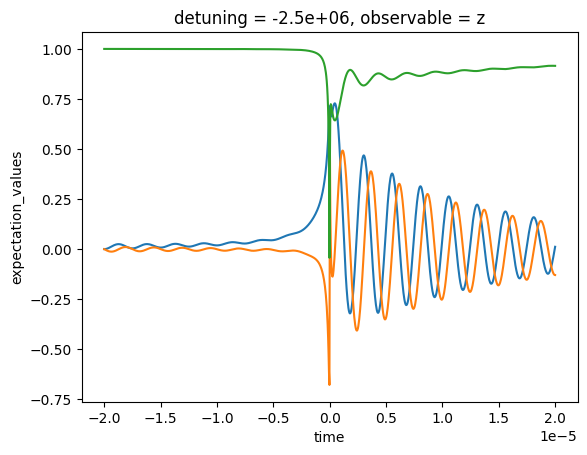

In [5]:
results.data.sel(observable="x", detuning=detunings[25]).plot()
results.data.sel(observable="y", detuning=detunings[25]).plot()
results.data.sel(observable="z", detuning=detunings[25]).plot()